# 1. Data Manipulation

### 1.1. Getting Started

In [9]:
import torch

In [34]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [35]:
x.numel()

12

In [36]:
x.shape

torch.Size([12])

In [37]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [38]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [39]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [40]:
torch.randn(3, 4)

tensor([[ 0.2405, -1.2363,  1.7516, -0.9365],
        [-0.2907, -0.1825,  1.4015,  2.5903],
        [ 1.1134, -1.4127, -0.5936, -1.2694]])

In [41]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 1.2. Indexing and Slicing

In [42]:
X, X[-1], X[1:3]

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [43]:
X[1, 2] = 12
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 12.,  7.],
        [ 8.,  9., 10., 11.]])

In [44]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 1.3. Operations

In [45]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [46]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [48]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
X, Y, torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[2., 1., 4., 3.],
         [1., 2., 3., 4.],
         [4., 3., 2., 1.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [59]:
X == Y, X < Y, X > Y

(tensor([[ True, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False,  True,  True,  True],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]))

In [50]:
X.sum()

tensor(66.)

### 1.4. Broadcasting

In [51]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [52]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [60]:
a = torch.arange(3).reshape((3, 1, 1))
b = torch.arange(2).reshape((1, 2, 1))
c = torch.arange(3).reshape((1, 1, 3))

In [61]:
a+b+c

tensor([[[0, 1, 2],
         [1, 2, 3]],

        [[1, 2, 3],
         [2, 3, 4]],

        [[2, 3, 4],
         [3, 4, 5]]])

### 1.5. Saving Memory

In [54]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [55]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 1730340511152
id(Z): 1730340511152


In [56]:
before = id(X)
X += Y
id(X) == before

True

### 1.6. Conversion to Other Python Objects

In [57]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [58]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

# 2. Data Preprocessing 

### 2.1. Reading the Dataset

In [17]:
import os

os.makedirs(os.path.join('C:\\Users\\Alexandre\\Documents\\Notebooks', 'data'), exist_ok=True) 
data_file = os.path.join('C:\\Users\\Alexandre\\Documents\\Notebooks', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [18]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### 2.2. Data Preparation

In [19]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1


In [23]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               0             1


### 2.3. Conversion to the Tensor Format

In [26]:
X, y = torch.tensor(inputs.values), torch.tensor(targets.values)
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# 3. Linear Algebra

### 3.1. Scalars

In [3]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 3.2. Vectors

In [4]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [5]:
x[2]

tensor(2)

In [6]:
len(x)

3

In [7]:
x.shape

torch.Size([3])

### 3.3. Matrices

In [8]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [9]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [10]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 3.4. Tensors

In [11]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 3.5. Basic Properties of Tensor Arithmetic

In [12]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [13]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [14]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 3.6. Reduction

In [15]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [19]:
A, A.shape, A.sum()

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor(15.))

In [24]:
A.sum(axis=0)

tensor([3., 5., 7.])

In [25]:
A.sum(axis=1)

tensor([ 3., 12.])

In [21]:
A.sum(axis=[0, 1]) == A.sum()

tensor(True)

In [22]:
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [23]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

### 3.7. Non-Reduction Sum

In [29]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [30]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [31]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

### 3.8. Dot Product

In [32]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [33]:
torch.sum(x * y)

tensor(3.)

### 3.9. Matrix-Vector Products

In [34]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

### 3.10. Matrix-Matrix Multiplication

In [35]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### 3.11. Norms

In [40]:
#l2
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [41]:
#l1
torch.abs(u).sum()

tensor(7.)

In [42]:
#Frobenius
torch.norm(torch.ones((4, 9)))

tensor(6.)

# 4. Calculus

In [1]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

### 4.1. Derivatives and Differentiation

In [2]:
def f(x):
    return 3*x**2 - 4*x

In [3]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


### 4.2. Visualization Utilities

In [4]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [5]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [6]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [7]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

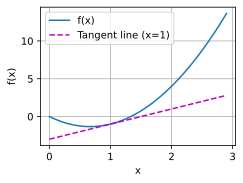

In [8]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# 5. Automatic Differentiation

### 5.1. A Simple Function

In [18]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [19]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [20]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [21]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [22]:
x.grad == 4 * x

tensor([True, True, True, True])

In [30]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 5.2. Backward for Non-Scalar Variables

In [31]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 5.3. Detaching Computation

In [32]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [33]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 5.4. Gradients and Python Control Flow

In [34]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [35]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [36]:
a.grad == d / a

tensor(True)

In [38]:
a, d

(tensor(0.2649, requires_grad=True), tensor(1084.9559, grad_fn=<MulBackward0>))

 # 6. Probability 

In [40]:
%matplotlib inline
import random
from torch.distributions.multinomial import Multinomial

In [41]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [53, 47]


In [42]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([46., 54.])

In [43]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.4700, 0.5300])

In [44]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.4981, 0.5019])

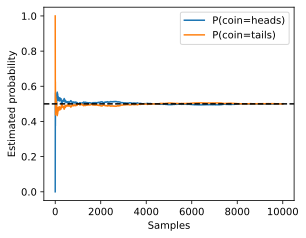

In [47]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

# 7. Documentation

In [48]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

In [49]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None